# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

Q1: Is the distribution of body temperatures normal?

In [2]:
print(df.head())
print(df.info()) #Sample size: 130

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


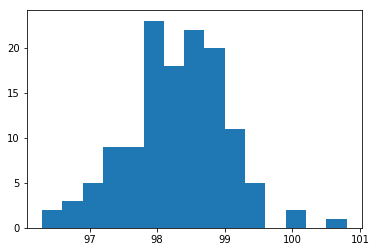

In [3]:
_ = plt.hist('temperature', data=df, bins=15)
plt.show() #A: Sample data looks vaguely normal... (right-skewed)

In [58]:
#Normality test: Calculate t-statistics of max and min
temps = df['temperature'].values

temps_max = max(temps)
temps_min = min(temps)
temps_mean = np.mean(temps)
temps_std = np.std(temps)
n_temps = len(temps)

t_stat_max = (temps_max - temps_mean) / temps_std
t_stat_min = (temps_mean - temps_min) / temps_std

print(t_stat_max)
print(t_stat_min)
#print(n_temps)

#Min value is only 2.5sigma away from mean, but max is 3.5sigma away.

'''
The "back-of-the-envelope" normality test indicates that normality is questionable with a value that is 3.5sigma
away from the mean and n = 130. However, because this is a biological characteristic, the distribution in the 
general population is likely very much normal, and thus the sample distribution is likely normal with a few outliers.

'''

3.4924927267748074
2.6688711006173778


'\nThe "back-of-the-envelope" normality test indicates that normality is questionable with a value that is 3.5sigma\naway from the mean and n = 130. However, because this is a biological characteristic, the distribution in the \ngeneral population is likely very much normal, and thus the sample distribution is likely normal with a few outliers.\n\n'

In [7]:
#Alternative normality test:

_, p = stats.normaltest(temps)
print(p) #p-value of 0.26 indicates high degree of normality, confirming analysis above^.

0.2587479863488254


Q2: Is the sample size large? Are the observations independent?

A: Sample size (n) is >30, so sample size is sufficiently large to apply Central Limit Theorem. The sample size is far less than 10% of the general population, so independence is a valid assumption.

Q3: Is the true population mean really 98.6 degrees F?

98.60000000000001


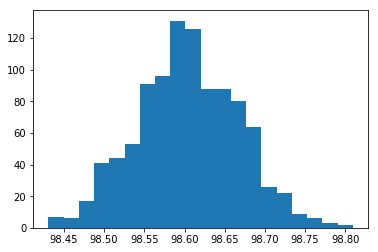

In [49]:
#BOOTSTRAP HYPOTHESIS TEST

#Null hypothesis: mean temp == 98.6
#Alternative hypothesis: mean temp != 98.6
#Significance level: 5%

#print(temps_mean) #Sample mean: 98.25
#print(temps_std) #Sample std: 0.73

temps_shift = temps + (98.6 - temps_mean) #Create new array of temp data with mean of 98.6
print(np.mean(temps_shift))

#t_stat_mean = (98.6 - temps_mean) / temps_std
#print (t_stat_mean) #0.48sigma from mean

sample_means = []
for i in range(1000):
    sample = np.random.choice(temps_shift, size=len(temps_shift), replace=True)
    sample_means.append(np.mean(sample))
    
#print(sample_means)
    
_ = plt.hist(sample_means, bins=20)
plt.show()

In [50]:
#Calculate probability (p-value) of obtaining mean of 98.25 from random sampling
deviation = 98.6 - temps_mean
p_value = (len(np.where(sample_means < (98.6 - deviation))) + len(np.where(sample_means > (98.6 + deviation)))) / 1000
print(p_value) #p = 0! => Null hypothesis NOT supported by sample data!

0


In [41]:
#FREQUENTIST STATISTICAL TEST - ONE-SAMPLE TEST
'''
Here we would use a ONE-SAMPLE test, because we are investigating whether a single sample 
could have been drawn from a larger population.

The sample size is greater than 30, but we don't know the std dev of the population, 
so the t-statistic must be used here.
'''

t_stat = (temps_mean - 98.6) / (temps_std / np.sqrt(len(temps)))
print(t_stat) #t = -5.476 => p-value ~ 0 (<0.00001) [Null hypothesis rejected]

-5.4759252020785585


In [40]:
#FREQUENTIST STATISTICAL TEST - TWO-SAMPLE TEST
'''
A TWO-SAMPLE TEST requires 2 samples for comparison, thus it is not appropriate to use here.
However, if we were to use the general population as the second sample, we would find that the 
number of data points in the 2nd population (n_genpop) would be much greater than the number of
data points in our current sample (n_temps). In other words, n_genpop >> n_temps.

In the equation for t, t is inversely proportial to sp2 (combined estimate of population variance).
For n2 >> n1, sp2 simplifies to s2 (std. dev of 2nd pop., genpop), which under the assumption of normality is 
equal to 1. Thus t simplifies to x1 - x2 / sqrt(1/n1) [where 1/n2 ~ 0], which is ALMOST the same 
as the one-sample equation.
'''

t_stat2 = (temps_mean - 98.6) / (1 / np.sqrt(len(temps)))
print(t_stat2) #t = -4 => p-value ~ 0 (0.0001) [SAME RESULT - Null hypothesis rejected]

-3.9993845680402167


Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [45]:
sample_10 = np.random.choice(temps, size=10)

sample_10_mean = np.mean(sample_10)
sample_10_std = np.std(sample_10)
print(sample_10_mean, sample_10_std)

(97.85, 0.829759001156358)


In [46]:
#ONE-SAMPLE TEST

'''
Use the t-statistic because both n < 30 and population std dev is unknown.
'''

t_stat_10 = (sample_10_mean - 98.6) / (sample_10_std / np.sqrt(len(sample_10)))
print(t_stat_10) #t = -2.86 => p-value ~ 0 [Null hypothesis rejected]

-2.858309752375154


In [47]:
#TWO-SAMPLE TEST

t_stat_10_2 = (sample_10_mean - 98.6) / (1 / np.sqrt(len(sample_10)))
print(t_stat_10_2) #t = -2.37 => p-value ~ 0 [Null hypothesis rejected]

-2.3717082451262845


Here, the ONE-SAMPLE test is, again, the correct test to use, for the same reasons as for the original sample.

The t-statistics for the sample size 10 sample are closer to 0 than the t-statistics of the original sample,
which indicates a higher probability of the data coming from the general population distribution (p-value). Assuming these values are indeed a subset of the general population, it confirms that t-statistics are more accurate for 
smaller n values (<30). If the population std dev. was known, the z-statistic would likely yield a higher p-value
for the original dataset as well.

Q5: At what temperature should we consider someone's temperature to be "abnormal"?

In [55]:
#Consider "abnormal" to be +- 2sigma from the mean
#(for a normal distribution, this is 95% of the values centered on the mean)
#Margin of error for 95% Confidence interval: CV * SE = CV * (S / sqrt(N))
#CV for 95% confidence is 1.96

margin_error = 1.96 * temps_std / np.sqrt(n_temps) #0.126
print(margin_error)

#True population mean is within 0.126 of 98.25 (sample mean) with confidence of 95%.

0.12555096480257902


In [57]:
#Using sample standard deviation
std_error = temps_std / np.sqrt(n_temps)
print(std_error)
print(temps_std)

0.06405661469519337
0.730357778905038


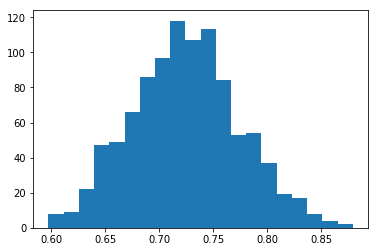

In [61]:
#BOOTSTRAP APPROACH FOR STD DEV:

sample_stddevs = []
for i in range(1000):
    sample = np.random.choice(temps, size=n_temps, replace=True)
    sample_stddevs.append(np.std(sample))
    
_ = plt.hist(sample_stddevs, bins=20)
plt.show()

In [62]:
#Find 95% confidence interval
bottom = np.percentile(sample_stddevs, 2.5)
top = np.percentile(sample_stddevs, 97.5)

print(bottom, top) #=> Stddev of population is between 0.63 and 0.83, with 95% confidence

(0.6308834183477569, 0.8258941709038269)


In [66]:
#Combining above, estimation of temperatures 2sigma away from true population mean is (95% confidence):

upper_2sigma_upper_bound = (temps_mean + margin_error) + (2 * top)
upper_2sigma_lower_bound = (temps_mean + margin_error) + (2 * bottom)

lower_2sigma_upper_bound = (temps_mean - margin_error) - (2 * top)
lower_2sigma_lower_bound = (temps_mean - margin_error) - (2 * bottom)

print(upper_2sigma_upper_bound, upper_2sigma_lower_bound, lower_2sigma_upper_bound, lower_2sigma_lower_bound)
#99.6F - 100.0F is lower bound for "abnormally" high, 96.5F - 96.9F is upper bound for "abnormally" low

(100.026570075841, 99.63654857072885, 96.4718914626205, 96.86191296773265)


Q6: Is there a significant difference between males and females in normal temperature?

In [70]:
#Split df into two dfs
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']

male_temps = df_male['temperature'].values
female_temps = df_female['temperature'].values

male_temps_mean = np.mean(male_temps)
male_temps_stddev = np.std(male_temps)
n_male_temps = len(male_temps)
print(male_temps_mean, male_temps_stddev, n_male_temps)

female_temps_mean = np.mean(female_temps)
female_temps_stddev = np.std(female_temps)
n_female_temps = len(female_temps)
print(female_temps_mean, female_temps_stddev, n_female_temps)

(98.10461538461537, 0.6933598841828699, 65)
(98.39384615384614, 0.7377464486428966, 65)


In [73]:
#To perform significance test, use two-sample t-test
#Null hypothesis: Male mean temp = Female mean temp
temp_diff = female_temps_mean - male_temps_mean
combined_variance = np.sqrt(((female_temps_stddev ** 2) / n_female_temps) + ((male_temps_stddev ** 2) / n_male_temps))
t = temp_diff / combined_variance
print(temp_diff, combined_variance, t) #t = 2.3 => From t-table lookup, significant difference at level of ~0.03

(0.2892307692307696, 0.12557668521231213, 2.3032202891943516)


In [75]:
#95% confidence interval (CV = 1.96):
interval2_upper = temp_diff + (1.96 * combined_variance)
interval2_lower = temp_diff - (1.96 * combined_variance)
print(interval2_upper, interval2_lower)
#value of 0 is not included in confidence interval, so can say with 95% confidence, 
#that there is significant difference between male and female temps at level of about 0.04

(0.5353610722469014, 0.04310046621463784)


## CONCLUSION

From this sample data, it would seem that the accepted average body temperature of 98.6F is NOT correct. We can say with 95% confidence, that the true population mean is within 0.126F of 98.25F, and that for the general population, a body temperature of between 99.6F and 100.0F (on the high side) and 96.5F and 96.9F (on the low side) should be considered "abnormal". We also find that there is a significant difference between the average male and female body temperature of between 0.04F and 0.54F.